In [41]:
import pandas as pd
import statistics


In [23]:
data=pd.read_csv("IA_metadata_full.csv")

C:\Users\lucia\AppData\Local\Temp\ipykernel_6180\3470894466.py:1: DtypeWarning: Columns (10,11,23) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("IA_metadata_full.csv")


In [24]:
centers=pd.read_csv("total scans - Sheet1.csv")

In [28]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'title', 'author', 'camera',
       'contributor', 'publish_date', 'language', 'operator', 'ppi',
       'repub_state', 'scanner', 'scanningcenter', 'sponsor', 'scandate',
       'imagecount', 'republisher_operator', 'republisher_date',
       'republisher_time', 'scanfee', 'sponsordate', 'ocr_converted',
       'page_number_confidence', 'search_date', 'year', 'date', 'month'],
      dtype='object')

In [29]:
dates=pd.to_datetime(data["date"].dropna())


In [35]:
(dates.max()-dates.min()).days

8322

In [40]:
data["operator"].value_counts()

scanner-shenzhen-leo@archive.org           33371
associate-saw-thein@archive.org            29213
associate-lian-kam@archive.org             26612
microfilm-processing@archive.org           17391
associate-rhialyn-opena@archive.org        15873
                                           ...  
ttscribe3.sok.archive.org                      1
University of Illinois Urbana-Champaign        1
canner-marc-anthony                            1
associate-evangilyn-dayday@archive.org         1
associate-waishan-lo@archive.org               1
Name: operator, Length: 2927, dtype: int64

In [54]:
num_books=[]
num_pages=[]
median_turnover=[]
starts=[]
ends=[]
days=[]
workers=[]
for a in list(centers["alt_names"]):
    a=a.replace("'", "").replace("[", "").replace("]", "")
    query=[]
    for b in a.split(", "):
        b=b.replace(" ", "")        
        print(b)
        query.append(b)
    print(query)
    temp=data[data["scanningcenter"].isin(query)]
    print(temp.shape)
    dates=pd.to_datetime(temp["date"].dropna())
    starts.append(dates.min())
    ends.append(dates.max())
    days=(dates.max()-dates.min()).days
    num_books.append(temp.shape[0])
    num_pages.append(temp["imagecount"].sum())
    
    scanners=set(temp["operator"])
    workers.append(len(scanners))
    length=[]
    for s in scanners:
        temp=pd.to_datetime(data[data["operator"]==s]["date"].dropna())
        time=(temp.max()-temp.min()).days
        if time>0:
            length.append(time)
    try:
        median_turnover.append(statistics.median(length))
    except:
        median_turnover.append(0)


alberta
['alberta']
(47908, 28)
tt_amnh
['tt_amnh']
(9, 28)
amherst
['amherst']
(5, 28)
tt_jakarta
['tt_jakarta']
(1, 28)
hangzhou
['hangzhou']
(1, 28)
clemson
['clemson']
(2, 28)
clarksville
['clarksville']
(2, 28)
tt_victoria
['tt_victoria']
(1, 28)
poughkeepsie
['poughkeepsie']
(1, 28)
tt_riks
['tt_riks']
(1, 28)
guatemala
['guatemala']
(30, 28)
harrisburg
['harrisburg']
(4, 28)
tt_stanfordlaw
['tt_stanfordlaw']
(9, 28)
tt_pem
['tt_pem']
(4, 28)
tt_calacademy
['tt_calacademy']
(2, 28)
tt_swinburne
['tt_swinburne']
(16, 28)
tt_warwick
['tt_warwick']
(3, 28)
tt_harvardernstmayr
['tt_harvardernstmayr']
(118, 28)
honolulu
['honolulu']
(135, 28)
sacramento
['sacramento']
(60, 28)
beijing
['beijing']
(57, 28)
pretoria
['pretoria']
(256, 28)
tt_osu
['tt_osu']
(429, 28)
rexburg
['rexburg']
(304, 28)
trent
['trent']
(30, 28)
lond
london
['lond', 'london']
(2338, 28)
washingtondc
['washingtondc']
(3089, 28)
tt_georgetown
['tt_georgetown']
(1209, 28)
manhattan
['manhattan']
(1553, 28)
tt_banga

In [58]:
days=[]
for a in list(centers["alt_names"]):
    a=a.replace("'", "").replace("[", "").replace("]", "")
    query=[]
    for b in a.split(", "):
        b=b.replace(" ", "")        
        print(b)
        query.append(b)
    print(query)
    temp=data[data["scanningcenter"].isin(query)]
    dates=pd.to_datetime(temp["date"].dropna())
    days.append((dates.max()-dates.min()).days)


alberta
['alberta']
tt_amnh
['tt_amnh']
amherst
['amherst']
tt_jakarta
['tt_jakarta']
hangzhou
['hangzhou']
clemson
['clemson']
clarksville
['clarksville']
tt_victoria
['tt_victoria']
poughkeepsie
['poughkeepsie']
tt_riks
['tt_riks']
guatemala
['guatemala']
harrisburg
['harrisburg']
tt_stanfordlaw
['tt_stanfordlaw']
tt_pem
['tt_pem']
tt_calacademy
['tt_calacademy']
tt_swinburne
['tt_swinburne']
tt_warwick
['tt_warwick']
tt_harvardernstmayr
['tt_harvardernstmayr']
honolulu
['honolulu']
sacramento
['sacramento']
beijing
['beijing']
pretoria
['pretoria']
tt_osu
['tt_osu']
rexburg
['rexburg']
trent
['trent']
lond
london
['lond', 'london']
washingtondc
['washingtondc']
tt_georgetown
['tt_georgetown']
manhattan
['manhattan']
tt_bangalore
tt_sok
['tt_bangalore', 'tt_sok']
gainesville
['gainesville']
tt_getty
['tt_getty']
edinburgh
['edinburgh']
raleigh
['raleigh']
sfciviccenter
['sfciviccenter']
durham
durham2
Durham
['durham', 'durham2', 'Durham']
providence
tt_providence
['providence', 'tt_

In [60]:
centers["total_books"]=num_books
centers["total_pages"]=num_pages

centers["median_turnover"]=median_turnover
centers["days"]=days
centers["total_workers"]=workers




In [72]:
centers=centers.dropna()

In [73]:
centers["pages_per_day"]=centers["total_pages"]/centers["days"]

In [75]:
centers["productivity_per_worker"]=centers["pages_per_day"]/centers["total_workers"]

In [80]:
centers.to_csv("per_center_stats.csv")

In [78]:
centers

,name,alt_names,total_scans,start_date,end_date,months,average_scans_per_month,total_books,total_pages,median_turnover,days,total_workers,pages_per_day,productivity_per_worker
0,University of Alberta,['alberta'],1,2010-04-30 0:00:00,0000-00-00,1,1,47908,7636321.0,371.0,5187.0,24,1.472204e+03,61.341824
1,American Museum of Natural History,['tt_amnh'],9,2016-07-31 0:00:00,2017-02-28 0:00:00,6,1,9,3822.0,230.0,230.0,1,1.661739e+01,16.617391
2,Yiddish Book Center,['amherst'],5,2012-01-31 0:00:00,0000-00-00,5,1,5,826.0,0.0,184.0,4,4.489130e+00,1.122283
3,Centre for Strategic and International Studies...,['tt_jakarta'],1,2014-10-31 0:00:00,0000-00-00,1,1,1,184.0,0.0,0.0,1,inf,inf
4,Zhejiang University,['hangzhou'],1,2011-07-31 0:00:00,0000-00-00,1,1,1,10.0,1281.0,0.0,1,inf,inf
5,Clemson University,['clemson'],2,2012-04-30 0:00:00,2014-05-31 0:00:00,2,1,2,484.0,762.0,762.0,1,6.351706e-01,0.635171
6,John Hopkins University Library Offsite Storage,['clarksville'],2,2021-03-31 0:00:00,0000-00-00,2,1,2,762.0,3855.0,6.0,1,1.270000e+02,127.000000
7,University of Victoria,['tt_victoria'],1,2017-01-31 0:00:00,0000-00-00,1,1,1,552.0,0.0,0.0,1,inf,inf
8,Hopewell Junction,['poughkeepsie'],1,2014-07-31 0:00:00,0000-00-00,1,1,1,134.0,0.0,0.0,1,inf,inf
9,Research Institute of Korean Studies,['tt_riks'],1,2016-05-31 0:00:00,0000-00-00,1,1,1,260.0,0.0,0.0,1,inf,inf


In [110]:
turnover=centers[centers["median_turnover"]>2]
turnover=turnover[turnover["total_workers"]>10]

In [111]:
import matplotlib.pyplot as plt


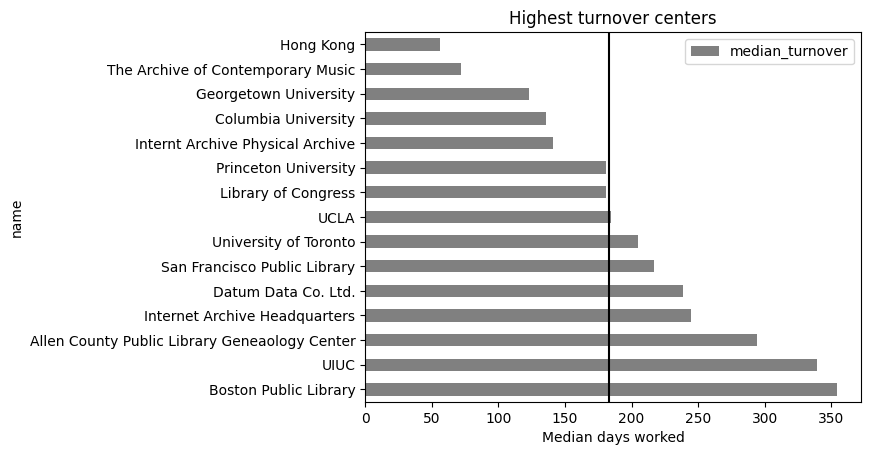

In [112]:
ax=turnover[["name", "median_turnover"]].sort_values(by="median_turnover").head(15).plot.barh(x="name", y="median_turnover", color="gray", title="Highest turnover centers")
ax.set_xlabel("Median days worked")
plt.axvline(x=183, color="black", label="overall median (183 days)")
ax.invert_yaxis()


In [104]:
turnover=centers[centers["productivity_per_worker"]!="inf"]
turnover=turnover[turnover["total_workers"]>5]

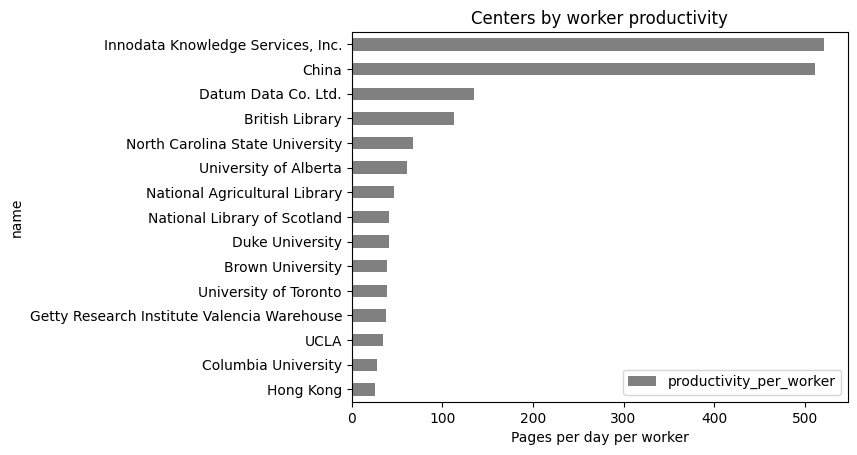

In [108]:
ax=turnover[["name", "productivity_per_worker"]].sort_values(by="productivity_per_worker", ascending=False).head(15).plot.barh(x="name", y="productivity_per_worker", color="gray", title="Centers by worker productivity")
ax.set_xlabel("Pages per day per worker")
ax.invert_yaxis()


In [ ]:
data=data.dropna(subset=["operator"])

In [42]:
scanner_info=data.groupby(by=["operator"])["imagecount"].agg(['sum','count'])

In [46]:
info=scanner_info.reset_index()

In [47]:
info

,operator,sum,count
0,scanner-Katie-Lawson,8024.0,18
1,1853,0.0,0
2,31924029454364,232.0,1
3,600,0.0,0
4,AAhsan,304.0,2
...,...,...,...
2922,zain,31516.0,81
2923,zarya@archive.org,25998.0,72
2924,zbroek,12257.0,37
2925,zbroekhuizen,1775.0,7


In [49]:
info=info[info["count"]>0]

In [73]:
scanners=list(info["operator"])

In [75]:
names=[]
for s in scanners:
    name=s.split("@")[0]
    name=name.replace("-"," ").replace("scanner", "").replace("associate","").replace("canner", "")
    names.append(name)

In [66]:
length=[]
for s in scanners:
    temp=pd.to_datetime(data[data["operator"]==s]["date"].dropna())
    time=temp.max()-temp.min()
    length.append(time)
    

12 days 00:00:00
0 days 00:00:00
0 days 00:00:00
37 days 00:00:00
126 days 00:00:00
73 days 00:00:00
117 days 00:00:00
NaT
1 days 00:00:00
0 days 00:00:00
0 days 00:00:00
0 days 00:00:00
0 days 00:00:00
1 days 00:00:00
1 days 00:00:00
437 days 00:00:00
14 days 00:00:00
0 days 00:00:00
21 days 00:00:00
34 days 00:00:00
1 days 00:00:00
0 days 00:00:00
30 days 00:00:00
8 days 00:00:00
0 days 00:00:00
0 days 00:00:00
22 days 00:00:00
35 days 00:00:00
0 days 00:00:00
NaT
70 days 00:00:00
56 days 00:00:00
0 days 00:00:00
8 days 00:00:00
160 days 00:00:00
0 days 00:00:00
37 days 00:00:00
0 days 00:00:00
83 days 00:00:00
404 days 00:00:00
3 days 00:00:00
0 days 00:00:00
NaT
50 days 00:00:00
29 days 00:00:00
134 days 00:00:00
NaT
29 days 00:00:00
8 days 00:00:00
71 days 00:00:00
36 days 00:00:00
0 days 00:00:00
2 days 00:00:00
113 days 00:00:00
0 days 00:00:00
0 days 00:00:00
49 days 00:00:00
39 days 00:00:00
0 days 00:00:00
276 days 00:00:00
6 days 00:00:00
0 days 00:00:00
295 days 00:00:00
1 

270 days 00:00:00
35 days 00:00:00
1325 days 00:00:00
2358 days 00:00:00
82 days 00:00:00
43 days 00:00:00
0 days 00:00:00
1201 days 00:00:00
1242 days 00:00:00
567 days 00:00:00
77 days 00:00:00
721 days 00:00:00
1050 days 00:00:00
0 days 00:00:00
7 days 00:00:00
0 days 00:00:00
18 days 00:00:00
2025 days 00:00:00
726 days 00:00:00
1026 days 00:00:00
329 days 00:00:00
907 days 00:00:00
91 days 00:00:00
1014 days 00:00:00
916 days 00:00:00
893 days 00:00:00
1206 days 00:00:00
403 days 00:00:00
381 days 00:00:00
856 days 00:00:00
205 days 00:00:00
1260 days 00:00:00
1059 days 00:00:00
951 days 00:00:00
1313 days 00:00:00
945 days 00:00:00
0 days 00:00:00
1130 days 00:00:00
32 days 00:00:00
3 days 00:00:00
373 days 00:00:00
12 days 00:00:00
6 days 00:00:00
1015 days 00:00:00
106 days 00:00:00
156 days 00:00:00
357 days 00:00:00
24 days 00:00:00
7 days 00:00:00
538 days 00:00:00
138 days 00:00:00
0 days 00:00:00
393 days 00:00:00
46 days 00:00:00
0 days 00:00:00
50 days 00:00:00
13 days 0

374 days 00:00:00
602 days 00:00:00
1 days 00:00:00
23 days 00:00:00
17 days 00:00:00
97 days 00:00:00
6 days 00:00:00
1054 days 00:00:00
1287 days 00:00:00
1 days 00:00:00
0 days 00:00:00
686 days 00:00:00
163 days 00:00:00
681 days 00:00:00
719 days 00:00:00
0 days 00:00:00
0 days 00:00:00
362 days 00:00:00
20 days 00:00:00
164 days 00:00:00
1537 days 00:00:00
279 days 00:00:00
730 days 00:00:00
1062 days 00:00:00
383 days 00:00:00
1191 days 00:00:00
0 days 00:00:00
56 days 00:00:00
0 days 00:00:00
118 days 00:00:00
0 days 00:00:00
303 days 00:00:00
30 days 00:00:00
33 days 00:00:00
23 days 00:00:00
13 days 00:00:00
1036 days 00:00:00
255 days 00:00:00
2 days 00:00:00
532 days 00:00:00
0 days 00:00:00
63 days 00:00:00
33 days 00:00:00
1 days 00:00:00
633 days 00:00:00
245 days 00:00:00
1611 days 00:00:00
245 days 00:00:00
321 days 00:00:00
60 days 00:00:00
1814 days 00:00:00
672 days 00:00:00
117 days 00:00:00
633 days 00:00:00
523 days 00:00:00
258 days 00:00:00
1170 days 00:00:00
4

195 days 00:00:00
NaT
24 days 00:00:00
349 days 00:00:00
22 days 00:00:00
112 days 00:00:00
40 days 00:00:00
0 days 00:00:00
10 days 00:00:00
213 days 00:00:00
670 days 00:00:00
76 days 00:00:00
88 days 00:00:00
113 days 00:00:00
682 days 00:00:00
141 days 00:00:00
29 days 00:00:00
490 days 00:00:00
89 days 00:00:00
400 days 00:00:00
0 days 00:00:00
NaT
231 days 00:00:00
184 days 00:00:00
41 days 00:00:00
0 days 00:00:00
4 days 00:00:00
0 days 00:00:00
282 days 00:00:00
1467 days 00:00:00
33 days 00:00:00
49 days 00:00:00
0 days 00:00:00
286 days 00:00:00
0 days 00:00:00
88 days 00:00:00
133 days 00:00:00
0 days 00:00:00
163 days 00:00:00
904 days 00:00:00
0 days 00:00:00
105 days 00:00:00
483 days 00:00:00
120 days 00:00:00
7 days 00:00:00
266 days 00:00:00
317 days 00:00:00
308 days 00:00:00
30 days 00:00:00
0 days 00:00:00
1281 days 00:00:00
108 days 00:00:00
3 days 00:00:00
815 days 00:00:00
286 days 00:00:00
NaT
0 days 00:00:00
116 days 00:00:00
74 days 00:00:00
0 days 00:00:00
0 

287 days 00:00:00
0 days 00:00:00
358 days 00:00:00
16 days 00:00:00
654 days 00:00:00
4 days 00:00:00
1254 days 00:00:00
99 days 00:00:00
78 days 00:00:00
175 days 00:00:00
225 days 00:00:00
469 days 00:00:00
114 days 00:00:00
205 days 00:00:00
32 days 00:00:00
59 days 00:00:00
2 days 00:00:00
390 days 00:00:00
801 days 00:00:00
21 days 00:00:00
2291 days 00:00:00
138 days 00:00:00
1004 days 00:00:00
9 days 00:00:00
55 days 00:00:00
695 days 00:00:00
6 days 00:00:00
287 days 00:00:00
5 days 00:00:00
1542 days 00:00:00
1511 days 00:00:00
19 days 00:00:00
875 days 00:00:00
18 days 00:00:00
443 days 00:00:00
14 days 00:00:00
157 days 00:00:00
51 days 00:00:00
57 days 00:00:00
1362 days 00:00:00
98 days 00:00:00
146 days 00:00:00
0 days 00:00:00
335 days 00:00:00
488 days 00:00:00
0 days 00:00:00
1911 days 00:00:00
21 days 00:00:00
33 days 00:00:00
76 days 00:00:00
513 days 00:00:00
5859 days 00:00:00
35 days 00:00:00
410 days 00:00:00
55 days 00:00:00
6 days 00:00:00
48 days 00:00:00
371

5 days 00:00:00
63 days 00:00:00
88 days 00:00:00
63 days 00:00:00
0 days 00:00:00
261 days 00:00:00
0 days 00:00:00
28 days 00:00:00
19 days 00:00:00
23 days 00:00:00
308 days 00:00:00
1373 days 00:00:00
896 days 00:00:00
1238 days 00:00:00
251 days 00:00:00
333 days 00:00:00
293 days 00:00:00
1058 days 00:00:00
139 days 00:00:00
1639 days 00:00:00
376 days 00:00:00
224 days 00:00:00
76 days 00:00:00
0 days 00:00:00
237 days 00:00:00
447 days 00:00:00
402 days 00:00:00
2765 days 00:00:00
51 days 00:00:00
318 days 00:00:00
1 days 00:00:00
197 days 00:00:00
308 days 00:00:00
167 days 00:00:00
30 days 00:00:00
142 days 00:00:00
1593 days 00:00:00
411 days 00:00:00
92 days 00:00:00
350 days 00:00:00
99 days 00:00:00
969 days 00:00:00
7 days 00:00:00
129 days 00:00:00
347 days 00:00:00
532 days 00:00:00
639 days 00:00:00
109 days 00:00:00
79 days 00:00:00
296 days 00:00:00
627 days 00:00:00
92 days 00:00:00
27 days 00:00:00
557 days 00:00:00
1148 days 00:00:00
240 days 00:00:00
60 days 00:

0 days 00:00:00
95 days 00:00:00
3 days 00:00:00
332 days 00:00:00
515 days 00:00:00
149 days 00:00:00
596 days 00:00:00
78 days 00:00:00
63 days 00:00:00
128 days 00:00:00
48 days 00:00:00
29 days 00:00:00
436 days 00:00:00
41 days 00:00:00
70 days 00:00:00
850 days 00:00:00
29 days 00:00:00
413 days 00:00:00
44 days 00:00:00
0 days 00:00:00
4 days 00:00:00
215 days 00:00:00
504 days 00:00:00
0 days 00:00:00
511 days 00:00:00
156 days 00:00:00
13 days 00:00:00
7 days 00:00:00
416 days 00:00:00
80 days 00:00:00
457 days 00:00:00
455 days 00:00:00
379 days 00:00:00
301 days 00:00:00
132 days 00:00:00
664 days 00:00:00
143 days 00:00:00
252 days 00:00:00
124 days 00:00:00
0 days 00:00:00
0 days 00:00:00
189 days 00:00:00
1 days 00:00:00
517 days 00:00:00
126 days 00:00:00
125 days 00:00:00
0 days 00:00:00
15 days 00:00:00
21 days 00:00:00
28 days 00:00:00
7 days 00:00:00
561 days 00:00:00
129 days 00:00:00
3555 days 00:00:00
1 days 00:00:00
395 days 00:00:00
3025 days 00:00:00
0 days 00:

In [69]:
info["length"]=length

C:\Users\lucia\AppData\Local\Temp\ipykernel_6320\2690275147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info["length"]=length


In [76]:
info["name"]=names

C:\Users\lucia\AppData\Local\Temp\ipykernel_6320\1616787454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info["name"]=names


In [88]:
info.to_csv("scanner_data.csv")

In [90]:
i[1]["length"].days

0

In [5]:
info=pd.read_csv("scanner_data.csv")

In [8]:
info

,Unnamed: 0,operator,sum,count,length,name,name_trim
0,0,scanner-Katie-Lawson,8024,18,12 days,Katie Lawson,Katie Lawson
1,4,AAhsan,304,2,0 days,AAhsan,AAhsan
2,5,ACOPELAND,4716,12,37 days,ACOPELAND,ACOPELAND
3,6,ADAVILA,10531,32,126 days,ADAVILA,ADAVILA
4,7,AFURLONG,1888,6,73 days,AFURLONG,AFURLONG
...,...,...,...,...,...,...,...
2910,2922,zain,31516,81,190 days,zain,zain
2911,2923,zarya@archive org,25998,72,354 days,zarya,zarya
2912,2924,zbroek,12257,37,33 days,zbroek,zbroek
2913,2925,zbroekhuizen,1775,7,270 days,zbroekhuizen,zbroekhuizen


In [14]:
lens=list(info["length"].dropna())

tot=0
count=0
median=[]
for l in lens:
    temp=int(l.split(" ")[0])
    tot+=temp
    if temp>0:
        median.append(temp)
        count+=1

In [21]:
statistics.median(median)


183

In [17]:
tot/count

450.04672897196264

In [104]:
import sys

In [ ]:
original_stdout = sys.stdout
with open('print.txt', 'w') as f:
    sys.stdout = f
    for i in info.iterrows():
        print("<tr>")
        print("<td>")
        print(i[1]["name"])
        print("</td>")
        print("<td>")
        if pd.isna(i[1]["length"]):
            print("No data")
        elif i[1]["length"].days==0:
            print("No data")
        else:
            print(str(i[1]["length"].days)+" Days")
        print("</td>")
        print("<td>")
        print(int(i[1]["count"]))
        print("</td>")
        print("<td>")
        print(int(i[1]["sum"]))
        print("</td>")
        print("</tr>")
    sys.stdout = original_stdout

In [38]:
data["operator"].value_counts()

scanner-shenzhen-leo@archive.org           33371
associate-saw-thein@archive.org            29213
associate-lian-kam@archive.org             26612
microfilm-processing@archive.org           17391
associate-rhialyn-opena@archive.org        15873
                                           ...  
ttscribe3.sok.archive.org                      1
University of Illinois Urbana-Champaign        1
canner-marc-anthony                            1
associate-evangilyn-dayday@archive.org         1
associate-waishan-lo@archive.org               1
Name: operator, Length: 2927, dtype: int64

In [30]:
data["imagecount"]

17         1276.0
54          290.0
62          302.0
71          134.0
87          466.0
            ...  
2972150      44.0
2972151     102.0
2972152     100.0
2972167     172.0
2972178     326.0
Name: imagecount, Length: 2474493, dtype: object

In [18]:
data["imagecount"].value_counts(dropna=False)

42.0      44336
198.0     35780
38.0      34793
34.0      31360
262.0     31246
          ...  
75.0          1
175.0         1
3.0           1
1784          1
1563.0        1
Name: imagecount, Length: 4377, dtype: int64

In [19]:
data["contributor"].value_counts(dropna=False)

Internet Archive                                                                                                                                                              1638087
Library Genesis                                                                                                                                                                229497
University of California Libraries                                                                                                                                              98547
Robarts - University of Toronto                                                                                                                                                 92768
The Library of Congress                                                                                                                                                         76087
                                                                                          

In [20]:
data["sponsor"].value_counts(dropna=False)

Kahle/Austin Foundation                                             1211088
Internet Archive                                                     386434
NaN                                                                  254727
Google                                                               222634
MSN                                                                  182325
                                                                     ...   
Smithsonian Institution                                                   1
associate-melanie-zapata@archive.org                                      1
20220104120630                                                            1
Center for the Study of Material and Visual Cultures of Religion          1
Atlas of Living Australia                                                 1
Name: sponsor, Length: 305, dtype: int64

In [21]:
data["scanningcenter"].value_counts(dropna=False)

cebu                    1059209
NaN                      507743
shenzhen                 244845
hongkong                 176389
uoft                     167739
                         ...   
poughkeepsie                  1
alberta                       1
MSN                           1
tt_riks                       1
1dollarscan (zLibro)          1
Name: scanningcenter, Length: 93, dtype: int64